## ADA - Lógica de Programação II

### Projeto Final da disciplina

Aluno: | Hugo Silva de Vasconcelos
------ | ------
Turma: | Be Tech By Braskem
Data de envio: | 28/06/2023


#### Sobre o projeto

Uma das características mais valiosas atualmente é conseguir extrair informações importantes de um volume considerável de dados. Não importa qual seja a área de atuação profissional (fármacos, telefonia, streaming), quase sempre podemos usar a análise de dados para gerar novos insights e gerar valor para o negócio.

Para o projeto final, você deverá demonstrar o conhecimento técnico em `Dicionários` e `Tuplas`, `Funções`, `Manipulação de arquivos` e `Tratamento de exceções`.


O trabalho deverá ser feito em grupo (divisão a ser definida). 

#### Sobre o critério de avaliação

Para o projeto final, serão avaliados os seguintes aspectos:

- Domínio técnico de em `Dicionários` e `Tuplas`, `Funções`, `Manipulação de arquivos` e `Tratamento de exceções` (individual)

- Participação e divisão do trabalho (em grupo)

- Organização do versionamento do projeto (em grupo)

#### Sobre a escolha do dataset

A base de dados é de livre escolha do grupo. Caso possível, recomendo que o dataset seja do trabalho/atividade dos membros do grupo. De qualquer modo, listo alguns projetos que são bem interessantes para trabalhar conceitos de análise de dados:

- [Filmes e séries - Netflix](https://www.kaggle.com/datasets/shivamb/netflix-shows)

- [Histórico de jogos da Copa do Mundo](https://www.kaggle.com/datasets/abecklas/fifa-world-cup)

- [Empresas unicórnio](https://www.kaggle.com/datasets/deepcontractor/unicorn-companies-dataset)

- [Histórico de layoffs](https://www.kaggle.com/datasets/theakhilb/layoffs-data-2022)

# To Do - Funções aprendidas aplicadas:
* [X] Tuplas
* [X] Zip
* [X] Dicionários
* [X] Compreensão de listas
* [X] Funções com multiplos retornos
* [X] Funções anônimas
* [X] Map, filter e reduce
  * Utilizei apenas o filter pois não encontrei aplicabilidade neste exercício para as demais funções de ordem superior.
* [ ] Recursão
  * Não consegui encaixar em nenhum exemplo do projeto.
* [X] Tratar exceções
* [X] Leitura de Arquivos

# Análise de Dados dos Salários de cientistas de dados em 2023

[Data Science Salaries 2023](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023)

## Leitura dos dados e criação da lista de dicionários
Nesta etapa utilizo da biblioteca `csv` para ler o dataset e criar uma lista de registros.

In [1]:
#Import das bibliotecas
import csv
import matplotlib.pyplot as plt

# Inicialização de variáveis
data = []
header = []
temp_data = {}

with open ('ds_salaries.csv', 'r') as arqv:        # Leitura do arquivo
    reader = csv.reader(arqv, delimiter=',', lineterminator='\n')
    header = next(reader)
    print(header)
    for row in reader:
        for col_name, value in zip(header, row):    # Função Zip para criação da tupla a ser utilizada como chave e valor no dicionário
            temp_data[col_name] = value             # Criação dinâmica de dicionário	
        data.append(temp_data)
        temp_data = {}

['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']


## Função que agrupa o salário pela chave selecionada

In [2]:
def agrupa_salario_por_chave(data, chave):
    salario = {}
    for row in data:
        if row[chave] in salario:
            salario[row[chave]].append(float(row['salary_in_usd']))
        else:
            salario[row[chave]] = [float(row['salary_in_usd'])]
    return salario

# Testando com a chave 'salary_currency'
salario_por_moeda = agrupa_salario_por_chave(data, 'salary_currency')
print(salario_por_moeda.keys())
print('BRL', salario_por_moeda['BRL'])
print('EUR', salario_por_moeda['EUR'][0:6])

dict_keys(['EUR', 'USD', 'INR', 'HKD', 'CHF', 'GBP', 'AUD', 'SGD', 'CAD', 'ILS', 'BRL', 'THB', 'PLN', 'HUF', 'CZK', 'DKK', 'JPY', 'MXN', 'TRY', 'CLP'])
BRL [9289.0, 19522.0, 7799.0, 6270.0, 12901.0, 18907.0]
EUR [85847.0, 69751.0, 96578.0, 48289.0, 38631.0, 53654.0]


## Função que formata o salário para o padrão brasileiro

Apesar do formato exibido ser o brasileiro, os valores utilizados são com base no dolar americano.

In [3]:
def formata_salario(salario):
    inteiros = salario // 1
    centavos = salario % 1
    inteiros = '{:,.0f}'.format(inteiros).replace(',', '.')
    centavos = '{:02d}'.format(int(centavos*100)).replace(' ', '0')
    return f'$ {inteiros},{centavos}'

formata_salario(1234.56)

'$ 1.234,55'

## Obtendo salário por nível de experiência

SE $ 153.051,07
MI $ 104.525,93
EN $ 78.546,28
EX $ 194.930,92


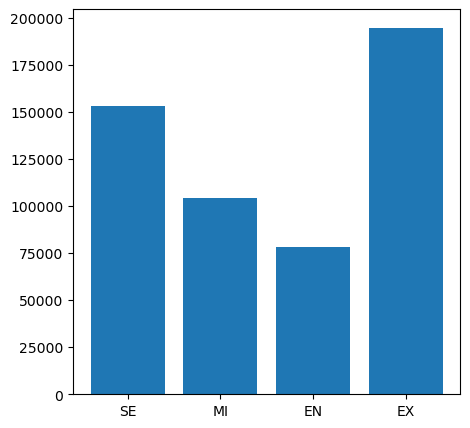

In [4]:
# Salário por nível de experiência

salario_por_experiencia = agrupa_salario_por_chave(data, 'experience_level')

# Calculando a média de salário por nível de experiência
for key in salario_por_experiencia.keys():
    print(key, formata_salario(sum(salario_por_experiencia[key])/len(salario_por_experiencia[key])))


plt.figure(figsize=(5, 5))
#Compreensão de lista
plt.bar(salario_por_experiencia.keys(), [sum(salario_por_experiencia[key])/len(salario_por_experiencia[key]) for key in salario_por_experiencia.keys()])
plt.show()

## Salário por título de emprego

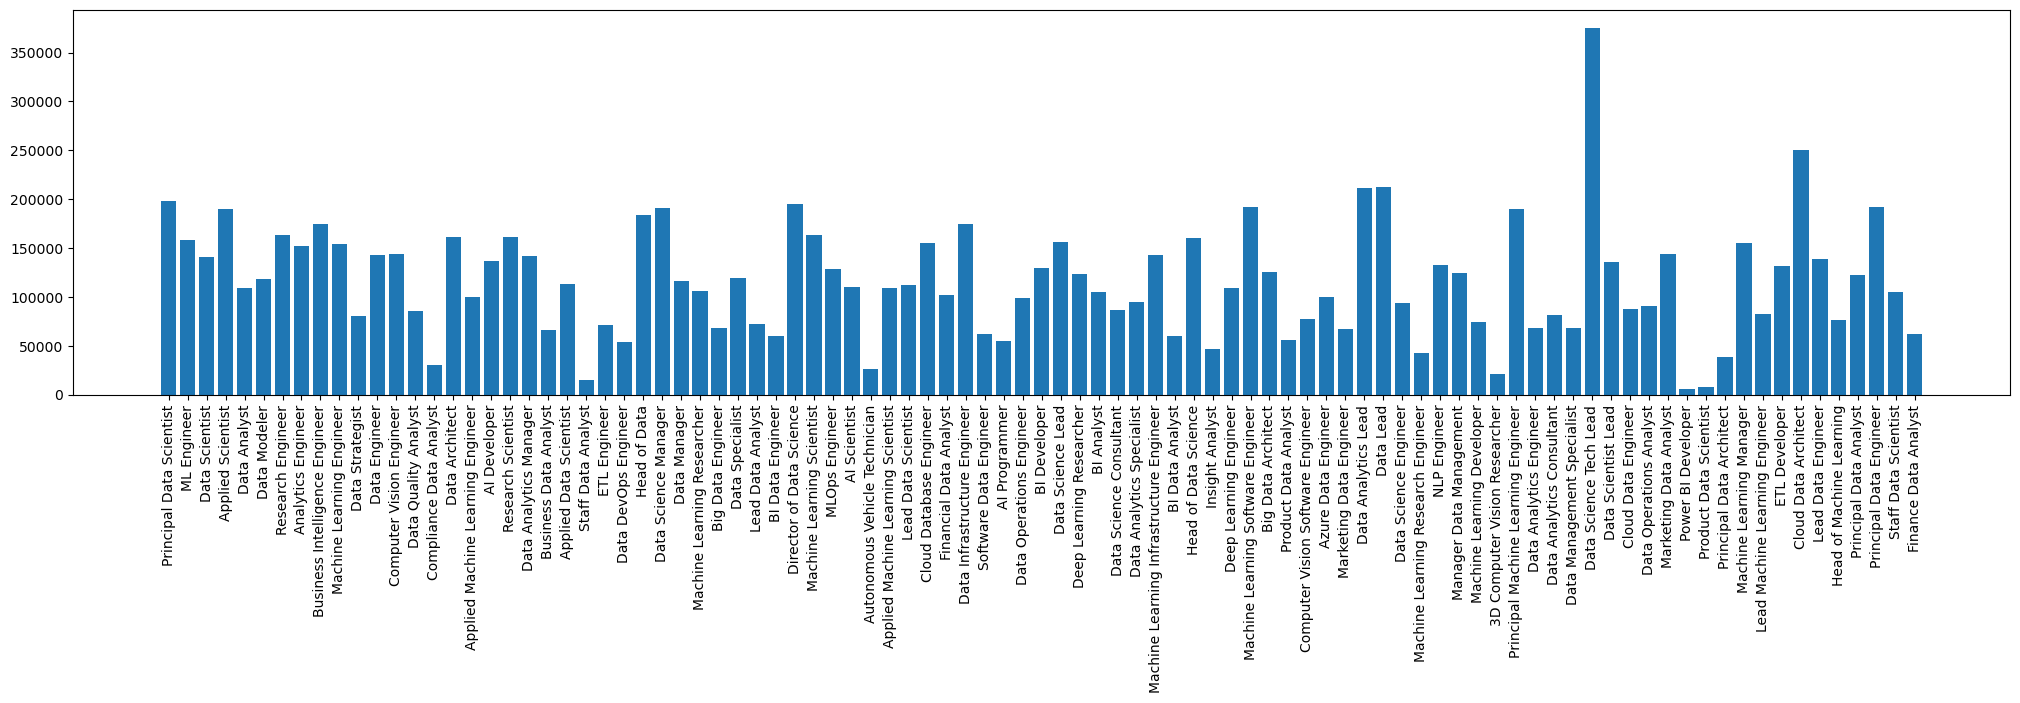

In [5]:
# Salario por título de emprego
salario_por_job_title = agrupa_salario_por_chave(data, 'job_title')

plt.figure(figsize=(25, 5))
# Compreensão de lista
plt.bar(salario_por_job_title.keys(), [sum(salario_por_job_title[key])/len(salario_por_job_title[key]) for key in salario_por_job_title.keys()])
plt.xticks(rotation=90)
plt.show()

## Obtendo dados sobre os salários de determinado emprego

In [6]:
# Função para retornar máximo mínimo e média de salário por job title
def busca_salario_por_job_title(job_title, verbose = True): # Função com parâmetro opcional e múltiplos retornos
    try:
        minimo = min(salario_por_job_title[job_title])
        maximo = max(salario_por_job_title[job_title])
        media = sum(salario_por_job_title[job_title]) / len(salario_por_job_title[job_title])
    except:
        raise Exception(f"Job title '{job_title}' não encontrado")
    if verbose:
        print(f'Mínimo: {formata_salario(minimo)}')
        print(f'Máximo: {formata_salario(maximo)}')
        print(f'Média: {formata_salario( media )}')
    return minimo, maximo, media

print("BI Data Analyst\n----------------")
busca_salario_por_job_title('BI Data Analyst')
print("\nAI Developer\n----------------")
busca_salario_por_job_title('AI Developer')
print("\nData Science Tech Lead\n----------------")
busca_salario_por_job_title('Data Science Tech Lead')


*_, media = busca_salario_por_job_title('Data Engineer', verbose=False)
print(f'----------------\nMédia de Salário de um Engenheiro de Dados: {formata_salario(media)}')

BI Data Analyst
----------------
Mínimo: $ 6.270,00
Máximo: $ 150.000,00
Média: $ 60.440,13

AI Developer
----------------
Mínimo: $ 6.304,00
Máximo: $ 300.000,00
Média: $ 136.666,09

Data Science Tech Lead
----------------
Mínimo: $ 375.000,00
Máximo: $ 375.000,00
Média: $ 375.000,00
----------------
Média de Salário de um Engenheiro de Dados: $ 142.785,73


## Teste do erro (Raise exception)

In [7]:
busca_salario_por_job_title("Analista de Dados")

Exception: Job title 'Analista de Dados' não encontrado

## Função para agrupar registros com base em determinado atributo

A função abaixo utiliza a função filter juntamente com uma função lambda para filtrar os registros que casem com o requisito chave valor passados como parâmetros.

In [ ]:
def agrupa_por_atributo(chave, valor):
    resultados = filter(lambda row: row[chave] == valor, data)      # Função Filter e Lambda( Função anônima )
    return resultados

Obtendo Dados sobre os salários de pessoas que trabalham com Dados e residem no Brasil utilizando a função 'agrupa_por_atributo' acima

In [ ]:
# Testando a função agrupa_por_atributo. Caso falhe a função imprime "Falhou !" e cessa a iteração
for registro in agrupa_por_atributo('employee_residence', 'BR'):
    if(registro['employee_residence'] != 'BR'):
        print("Falhou !")
        break
    else:
        print(f"Job Title: {registro['job_title']}\nNível de Experiência: {registro['experience_level']}\tSalário em USD: {formata_salario(float(registro['salary_in_usd']))}\n")

Job Title: Business Data Analyst
Nível de Experiência: MI	Salário em USD: $9.289,00

Job Title: Data Scientist
Nível de Experiência: EN	Salário em USD: $19.522,00

Job Title: Analytics Engineer
Nível de Experiência: MI	Salário em USD: $78.000,00

Job Title: Analytics Engineer
Nível de Experiência: MI	Salário em USD: $48.000,00

Job Title: Data Engineer
Nível de Experiência: MI	Salário em USD: $78.000,00

Job Title: Data Engineer
Nível de Experiência: MI	Salário em USD: $42.000,00

Job Title: BI Analyst
Nível de Experiência: MI	Salário em USD: $78.000,00

Job Title: BI Analyst
Nível de Experiência: MI	Salário em USD: $48.000,00

Job Title: Data Scientist
Nível de Experiência: MI	Salário em USD: $84.000,00

Job Title: Data Scientist
Nível de Experiência: MI	Salário em USD: $54.000,00

Job Title: Data Analyst
Nível de Experiência: EN	Salário em USD: $7.799,00

Job Title: BI Data Analyst
Nível de Experiência: EN	Salário em USD: $6.270,00

Job Title: Data Scientist
Nível de Experiência: SE	